##Data Augmentation

In most DL applications Data is one of the major bottlenecks it is not always easy to collect and lable data. We are always looking for smart ways to reduce the cost of data generation.

One way to do this data augmentaion, where we use the available data to produce more data samples.

In this example we will generate new samples of MNIST dataset using torchvision.transforms.



In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torchvision.utils import save_image
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from skimage import transform
import pandas as pd

%matplotlib inline

In [2]:
batch_sz = 32
num_classes = 10
transform_train = transforms.Compose([
                    transforms.ToTensor(),
                ])
transform_test = transforms.Compose([
                    transforms.ToTensor(),
                ])

# Training dataset
train_data = MNIST(root='./datasets', train=True, download=True, transform=transform_train)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_sz, shuffle=True,pin_memory=True)

# Test dataset
test_data = MNIST(root='./datasets', train=False, download=True, transform=transform_test)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=batch_sz, shuffle=False, pin_memory=True)


100%|██████████| 9912422/9912422 [00:00<00:00, 89402633.42it/s]


Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 22553657.39it/s]


Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 25017513.25it/s]


Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3222894.39it/s]


Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



In [3]:
im, label = train_data[0]
im.shape

torch.Size([1, 28, 28])

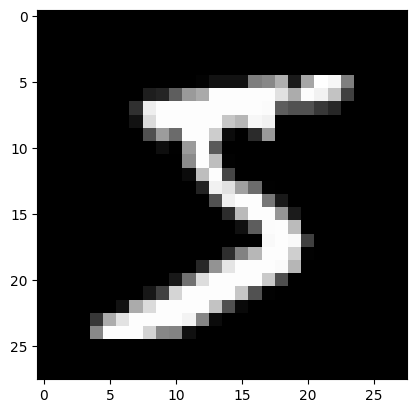

In [4]:
plt.imshow(im[0], cmap="gray")

In [5]:
for x,y in train_loader:
  print(x.shape)
  print(y.shape)
  break

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [6]:
# t -> [0-3] -> [shift_down, shift_up, shift_right, shift_left]

# t -> [2,1,3,5]

def translate(im, t):
  num_channels, num_rows, num_columns = im.shape
  for idx,val in enumerate(t):
    if val>0 and idx == 0:
      pad = torch.zeros((num_channels, val, num_columns))
      im = torch.concat((pad, im), dim=1)
      im = im[:, :num_rows, :num_columns]

    if val>0 and idx == 1:
      pad = torch.zeros((num_channels, val, num_columns))
      im = torch.concat((im, pad), dim=1)
      im = im[:, val:, :num_columns]

    if val>0 and idx == 2:
      pad = torch.zeros((num_channels, num_rows, val))
      im = torch.concat((pad, im), dim=2)
      im = im[:, :, :num_columns]

    if val>0 and idx == 3:
      pad = torch.zeros((num_channels, num_rows, val))
      im = torch.concat((im, pad), dim=2)
      im = im[:, :, val:]

  return im

In [7]:
im_ = translate(im, [2, 0, 0, 12])

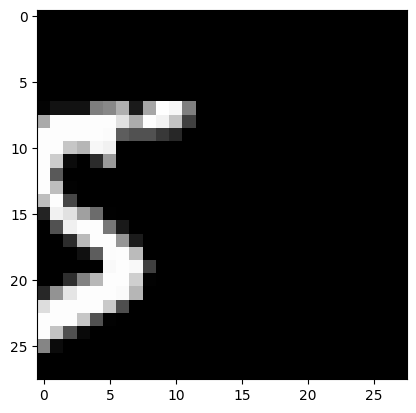

In [8]:
plt.imshow(im_[0], cmap="gray")

In [9]:
im_ = translate(im, [0, 4, 0, 0])

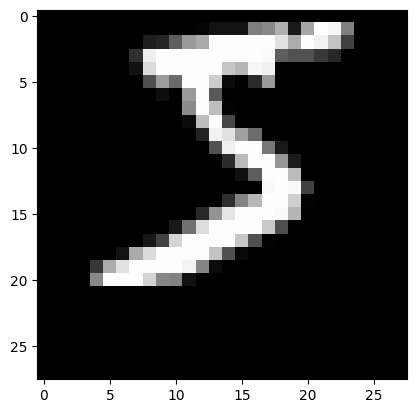

In [10]:
plt.imshow(im_[0], cmap="gray")

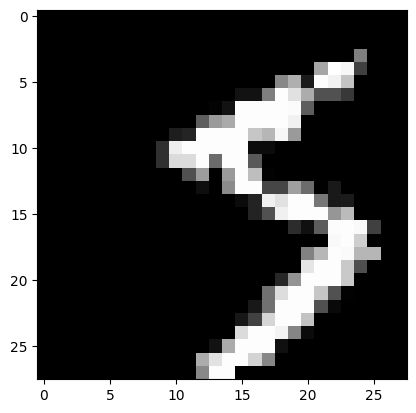

In [11]:
im_ = transforms.RandomAffine(degrees = 20, translate=[0.3,0.3])(im)
plt.imshow(im_[0], cmap="gray")

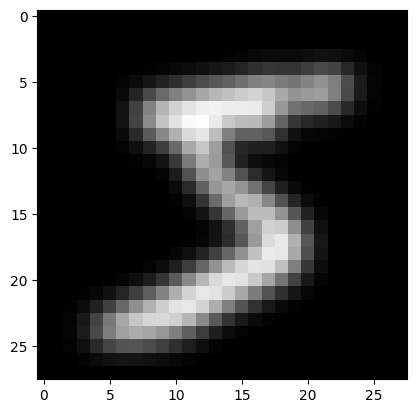

In [12]:
im_ = transforms.GaussianBlur(5)(im)
plt.imshow(im_[0], cmap="gray")

In [13]:
t1 = transforms.Compose([transforms.RandomAffine(degrees = 20, translate=[0.3,0.3]),
                         transforms.GaussianBlur(5)
                         ])

In [14]:
im_ = t1(im)

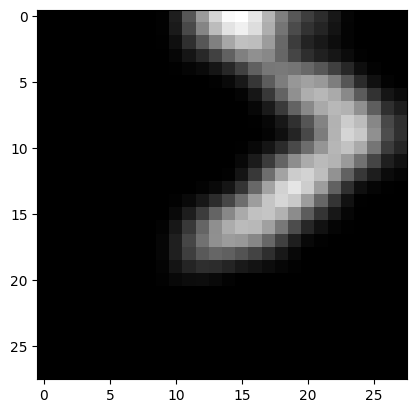

In [15]:
plt.imshow(im_[0], cmap="gray")

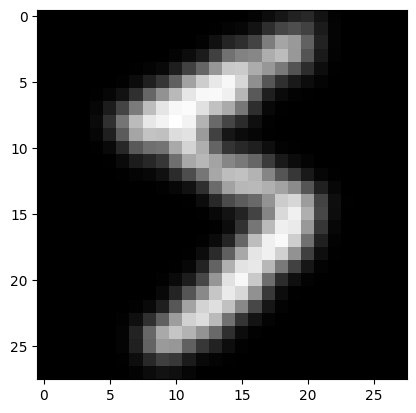

In [16]:
transform = transforms.Compose([transforms.ToTensor(),transforms.RandomAffine(30), transforms.ColorJitter([100,100])])
im_ = t1(im)
plt.imshow(im_[0], cmap="gray")

In [30]:
batch_sz = 32
num_classes = 10
transform = transforms.Compose([
    transforms.RandomAffine(degrees = 20, translate=[0.3,0.3]),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    ])

test_data = MNIST(root='./datasets', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=batch_sz, shuffle=False, pin_memory=True)


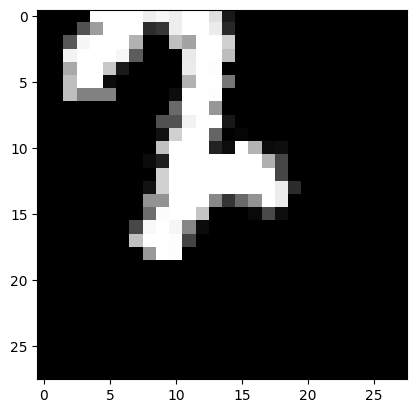

In [31]:
for x,y in test_loader:
  pass

plt.imshow(x[1][0], cmap="gray")

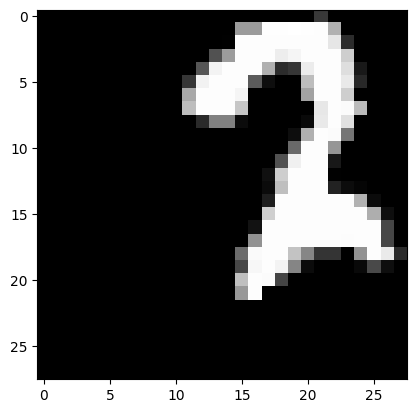

In [32]:
for x,y in test_loader:
  pass

plt.imshow(x[1][0], cmap="gray")